# Medical Insurance Data Analysis and Prediction

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score


In [2]:
#Directing path
path = os.getcwd()
os.chdir("E:\Data Projects\med insurance")

In [3]:
mdf = pd.read_csv('insurance.csv')
mdf = pd.DataFrame(mdf)   
display(mdf)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Creating data visualizations to understand data 

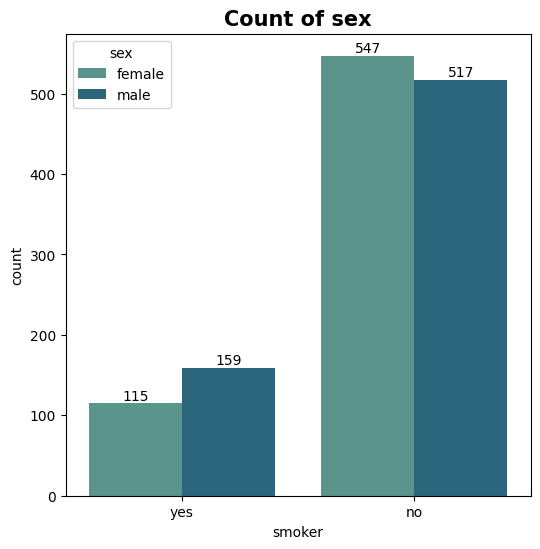

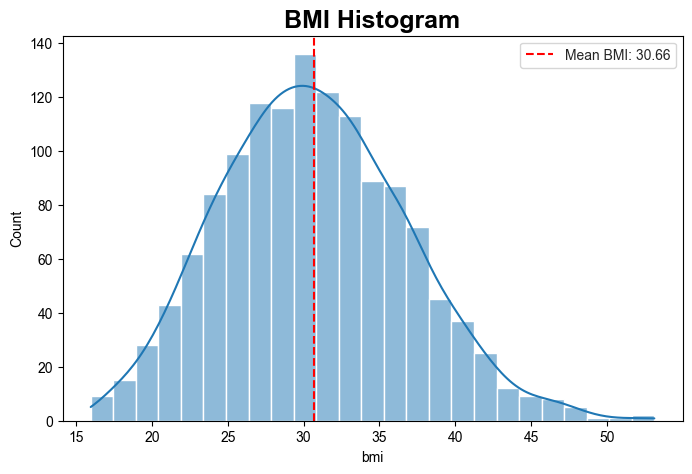

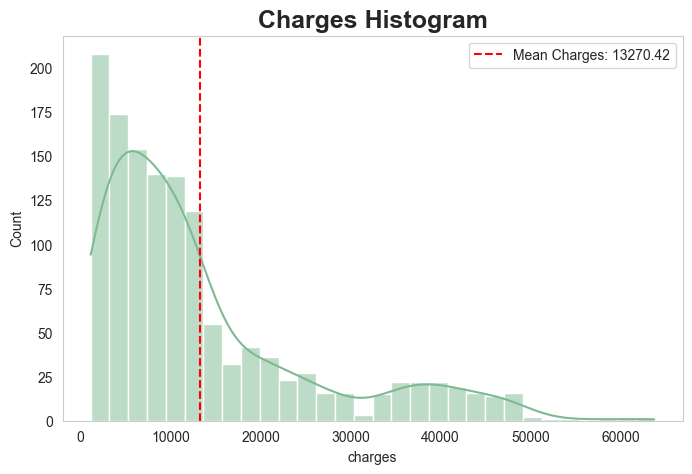

In [4]:
# Create a countplot for the sex
plt.figure(figsize=(6, 6))
ax= sns.countplot(data=mdf, x='smoker', hue='sex',palette='crest')
plt.title('Count of sex',fontweight = 'bold', fontsize= 15)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()

# BMI Histogram
fig, ax = plt.subplots(figsize=(8, 5))
sns.set_palette("crest")
sns.set_style("whitegrid", {'axes.grid': False})
sns.histplot(mdf['bmi'],kde=True)
plt.title("BMI Histogram", size=18, fontweight="bold")
mean_bmi= np.mean(mdf['bmi'])
# Add mean value to the plot
plt.axvline(mean_bmi, color='red', linestyle='--', label=f'Mean BMI: {mean_bmi:.2f}')
plt.legend()
plt.show()

#Charges Histogram
fig, ax = plt.subplots(figsize=(8, 5))
sns.set_palette("crest")
sns.set_style("whitegrid", {'axes.grid': False})
sns.histplot(mdf['charges'],kde=True)
plt.title("Charges Histogram", size=18, fontweight="bold")
mean_c= np.mean(mdf['charges'])
# Add mean value to the plot
plt.axvline(mean_c, color='red', linestyle='--', label=f'Mean Charges: {mean_c:.2f}')
plt.legend()
plt.show()

The graphs above show the countplot of males and females who smoke and the histogram of the BMI and Insurance charges with respected averages marked. These visuals can help us understand the dispersity of our data.

<Axes: title={'center': 'Box plot for charges 25 yrs and under Smokers'}, xlabel='charges', ylabel='smoker'>

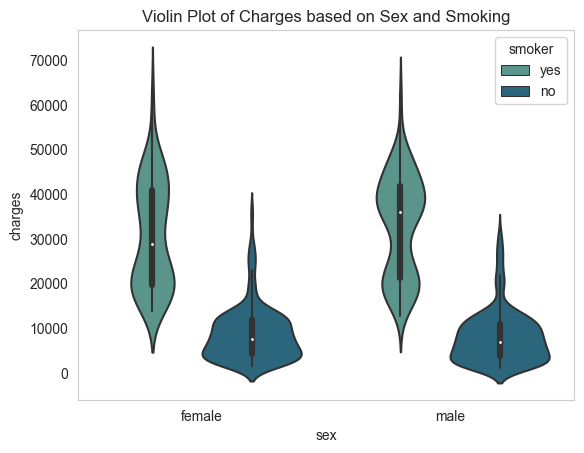

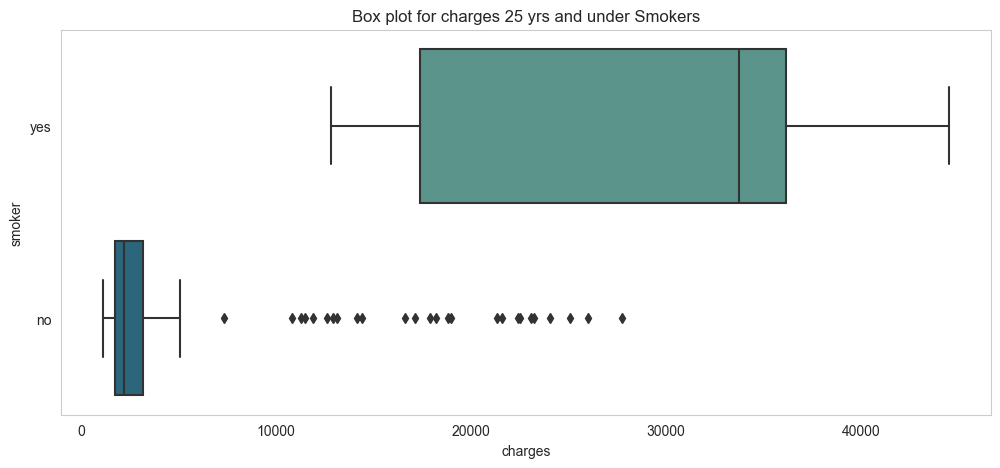

In [8]:
sns.violinplot(x="sex", y="charges", hue="smoker", data=mdf, palette = 'crest')
plt.title("Violin Plot of Charges based on Sex and Smoking")
# Box plot of smokers for 25 and under
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 25 yrs and under Smokers")
sns.boxplot(y="smoker", x="charges", data = mdf[(mdf.age <= 25)] , orient="h", palette = 'crest')

Violin charts are used to see the average of charges between males and females depending if they smoke or not. Male smokers have a higher insurance charge than female smokers, but both non smokers are about the same average. 

For people who are 25 and younger (typically could be under parents insurance as well, which is why this was looked into), if they smoked then the average charge was much higher than those who weren't smokers.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


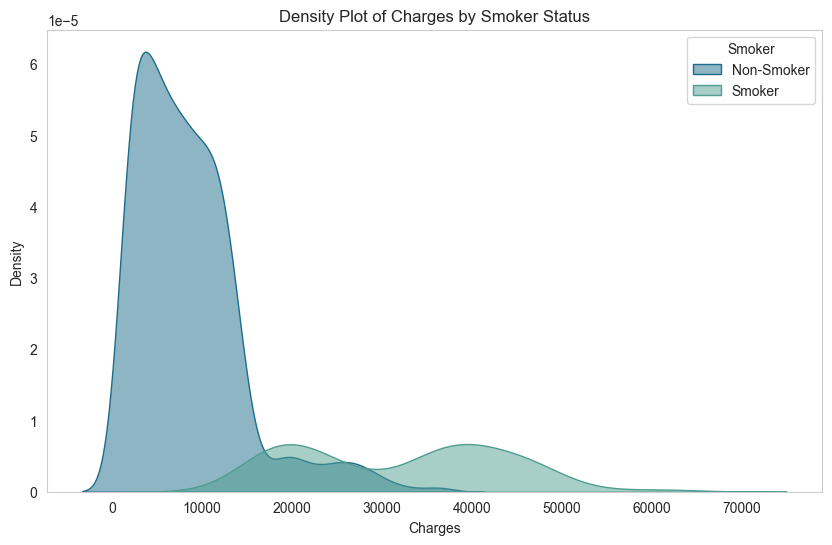

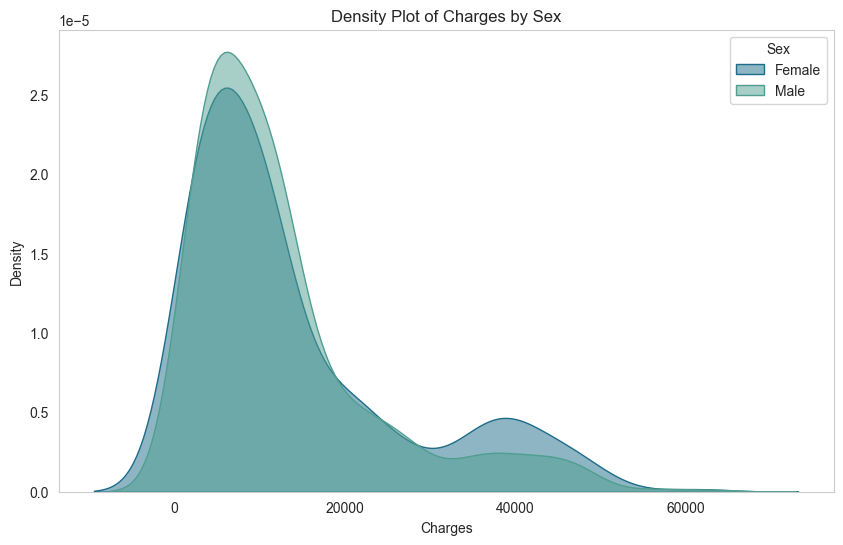

In [9]:
# Create a density plot for charges by smoker status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=mdf, x='charges', hue='smoker', fill=True, alpha=0.5, palette='crest')
plt.title('Density Plot of Charges by Smoker Status')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
# Calculate mean charges for smokers and non-smokers
mean_charges_smoker = mdf[mdf['smoker'] == 1]['charges'].mean()
mean_charges_non_smoker = mdf[mdf['smoker'] == 0]['charges'].mean()
# Add mean annotations
plt.text(mean_charges_non_smoker, 0.002, f'Mean charges (non-smoker): ${mean_charges_non_smoker:.2f}', color='blue', ha='center')
plt.text(mean_charges_smoker, 0.002, f'Mean charges (smoker): ${mean_charges_smoker:.2f}', color='red', ha='center')

plt.show()
# Create a density plot for charges by sex 
plt.figure(figsize=(10, 6))
sns.kdeplot(data=mdf, x='charges', hue='sex', fill=True, alpha=0.5, palette='crest')
plt.title('Density Plot of Charges by Sex')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()




The density plots are used to see the dispersity of charges between smokers and non smokers, and then males and females. The charges for both genders appears to be the same but for non smokers it is much denser in the 15000 or less range.

# Cleaning data
Region was turned into numerical values, but also separated into its 4 categories in a binomial output. Sex and Smoker columns were numerized.

In [11]:
region_dv = pd.get_dummies(mdf['region'], prefix='region')
region_dv.replace({True: 1, False: 0}, inplace=True)
smoker_dv = pd.get_dummies(mdf['region'], prefix='region')
mdf1 = pd.concat([mdf, region_dv], axis=1)
mdf1['smoker'] = mdf['smoker'].map(lambda x: 1 if x == 'yes' else 0) #Yes is 1, no is 0
mdf1['sex'] = mdf['sex'].map(lambda x: 1 if x == 'male' else 0) #female 1 male 0
region_mapping = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
mdf1['region'] =mdf['region'].map(region_mapping) #ennumerating regions for testing purposes 
display(mdf1)

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1,1725.55230,0,0,1,0
2,28,1,33.000,3,0,1,4449.46200,0,0,1,0
3,33,1,22.705,0,0,2,21984.47061,0,1,0,0
4,32,1,28.880,0,0,2,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,3,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,0,2007.94500,0,0,0,1


# Correlation Heat Map
Heat map used to see the dependency of the variables with charge

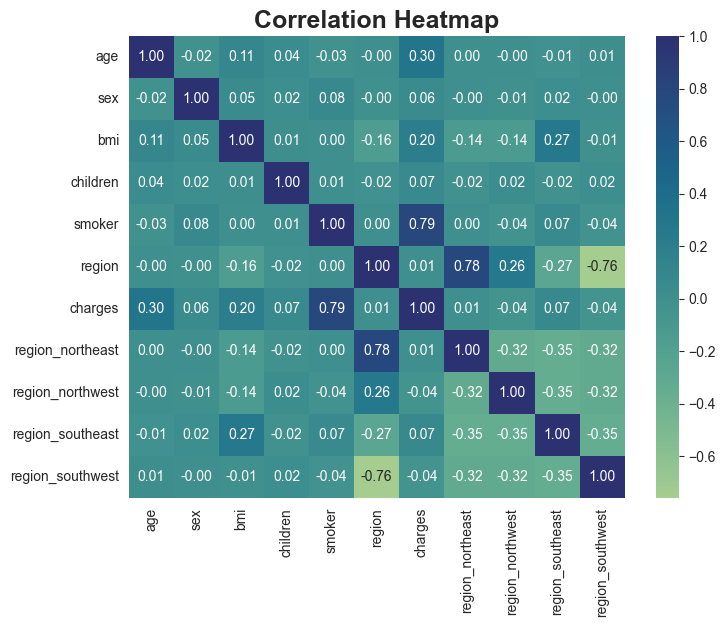

In [12]:
#Correlation heatmap
corr_matrix = mdf1.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='crest', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap',fontweight='bold', fontsize='18')
plt.show()

# Predicting insurance charge
Defining X and Y values so we can predict the insurance charge, dropping the region column in order to focus on the binomial columns we made for the individual regions. Also splitting our dataset into training and testing so we can apply multiple models.

In [13]:
# Defining x and y
x = mdf1.drop(['charges','region'], axis = 1)
y = mdf1.charges
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

## Linear Regression Model

In [14]:
#Linear Regression Model
lr = LinearRegression().fit(x_train,y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
print('Linear Regression Accuracy:',round(lr.score(x_test,y_test),3))

Linear Regression Accuracy: 0.796


## Random Forest Regressor Model

In [18]:
# RandomForestRegressor Model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=10)  # You can adjust the number of estimators
rf_regressor.fit(x_train, y_train)
y_pred_rf = rf_regressor.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("R^2 (RandomForestRegressor):", round(r2_rf,3))

Random Forest Mean Squared Error: 19246030.35343318
R^2 (RandomForestRegressor): 0.878


## XGBRegressor Model

In [19]:
# XGBRegressor Model
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_reg.fit(x_train, y_train)
y_pred_xgb = xgb_reg.predict(x_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error (XGBRegressor):", mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("R^2 (XGBRegressor):", r2_xgb)

Mean Squared Error (XGBRegressor): 23908747.912996527
R^2 (XGBRegressor): 0.848135281843895


## LGBMRegressor Model

Mean Squared Error (LGBMRegressor): 19160650.2693165
R^2 (LGBMRegressor): 0.878


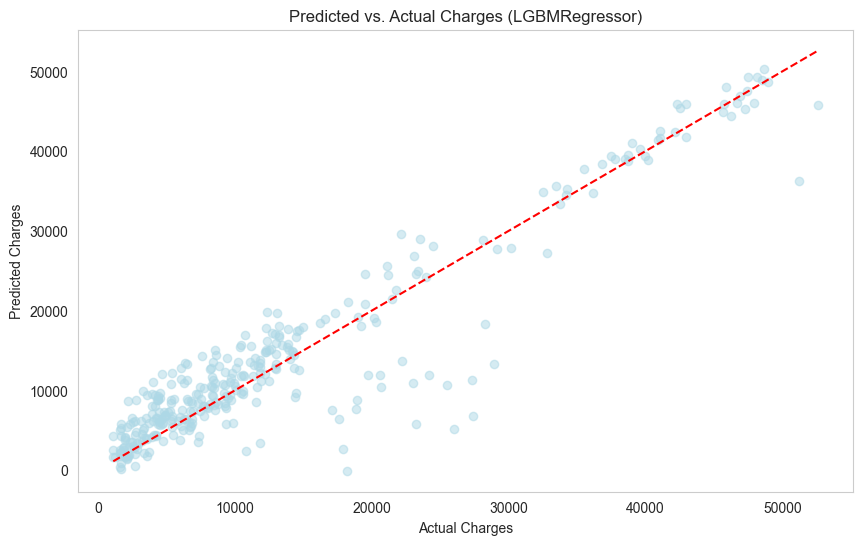

In [20]:
# LGBMRegressor Model
lgbm_reg = LGBMRegressor(random_state=42)
lgbm_reg.fit(x_train, y_train)
y_pred_lgbm = lgbm_reg.predict(x_test)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
print("Mean Squared Error (LGBMRegressor):", mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
print("R^2 (LGBMRegressor):", round(r2_lgbm,3))

# Ideal model due to lower MSE and high R2
# Create a scatter plot to visualize predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lgbm, color='lightblue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicted vs. Actual Charges (LGBMRegressor)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

Typically for MSE values, the lower the value the better. R^2 values scale for 0 to 1, so the closer to 1 the better the model (can also base on a percentage scale). With this information, LGBM Regressor had the best outcome and visually can be seen the prediction vs actual charges. The density of accurate values is high between 0 to 15000, and becomes more disperse and scarce for higher charges. This could be that the data doesn't have as rows that have high charges, so maybe more data can be added to have more variety. 

Overall, learned how to approach data and tell a story behind the data. Looking to improve on this more.